# Неустойчивые орбиты вокруг точки $L_1$
в круговой ограниченной задаче трех тел

### Условие задачи


**Дано:**
- движение невесомого тела в системе из двух массивных тел, вращающихся относительно общего центра масс, описывается системой уравнений:

$\begin{cases}
\ddot{x} - 2\dot{y} = \frac{\partial{U}}{\partial{x}} \\
\ddot{y} + 2\dot{x} = \frac{\partial{U}}{\partial{y}} \\
\ddot{z} = \frac{\partial{U}}{\partial{z}} \\
U = \frac{1}{2} (x^2 + y^2) + \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2} \\
r^2_1 = (x + \mu_2)^2 + y^2 + z^2 \\
r^2_2 = (x - \mu_1)^2 + y^2 + z^2
\end{cases}$

- методы Рунге-Кутты для интегрирования систем ОДУ первого порядка, рассмотренные на семинарах
- константы для системы уравнений и метод интегрирования необходимо выбрать самостоятельно в [таблице вариантов](https://docs.google.com/spreadsheets/d/1RvryyiQSz1TTAlwLxOuwmIAaZUZd2cdftZa7yHMPKBw/edit?usp=sharing) так, чтобы не было повторений
- алгоритм вычисления начальной скорости для неустойчивой орбиты вокруг $L_1$, рассмотренный на семинаре
- библиотека математических алгоритмов [Tracker Component Library](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/blob/master/Mathematical_Functions/Differential_Equations/RungeKStep.m)
- модули `numba`, `numpy`, `matplotlib`


**Требуется:**
1. Реализовать обобщенный метод Рунге-Кутты на основе таблицы Бутчера для интегрирования систем ОДУ первого порядка:

    - функция для расчета одного шага размера $h$
    - функция для расчета $n$ шагов размера $h$ (1)
    - подготовить таблицу Бутчера из `Tracker Component Library` (определяется вариантом задания)


2. Реализовать алгоритм вычисления начальной скорости для неустойчивой орбиты вокруг $L_1$:

    - модификация функции (1) для досрочной остановки интегрирования при условии пересечения одной из плоскостей
    - функция для расчета начальной скорости $vy_0$ на основе метода бисекции для орбиты, заданной начальным положением $(x_0, 0, z_0)$ и условием ортогональности вектора скорости и плоскости $XOZ$ в начальный момент времени
    
        - $d$ = $90\%$ расстояния от $L_1$ до малого массивного тела 
        - $x_{left} = x_{L1} - d$ - координата левой плоскости, заданной уравнением $x = x_{left}$
        - $x_{right} = x_{L1} + d$ - координата правой плоскости, заданной уравнением $x = x_{right}$


3. Реализовать алгоритм вычисления начальных скоростей орбит, начальные состояния которых заданы на решетке:
    - $(x_0, z_0) \in [x_{min}, x_{max}] \times [z_{min}, z_{max}]$

        - $x_{min} = x_{L1} - d / 3$
        - $x_{max} = x_{L1} + d / 3$
        - $z_{min} = 0.0$
        - $z_{max} = d / 3$

    - количество узлов на решетке $N \times N$


4. Использовать `@njit`, `@cfunc`, `prange` из модуля `numba` для компиляции всех функций и распараллеливания функции расчета на решетке


5. Вычислить начальные скорости и константы Якоби на заданных решетках
    - $J = 2 U - v^2$ - формула для вычисления константы Якоби
    - $h = \pi / 180$ - шаг по времени `t`
    - $x_{L1}$ - координата точки L1 (см. материалы семинара)
    - $[-1.0, 1.0]$ - начальный отрезок для уточнения скоростей методом бисекции (вероятно для некоторых систем этот отрезок не подойдет)


6. Измерить время вычислений


7. Сохранить результаты вычислений в файлах `*.npy` (функцией `np.save`)


8. Построить цветовые карты рассчитанных величин (начальная скорость, константа Якоби):

    - карты должны строиться по сохраненным данным, чтобы отрисовку можно было запустить без повторного выполнения расчетов
    - засечки по осям должны соответствовать координатам $x, z$, где $x$ отсчитывается относительно $x_{L1}$
    - единицы измерений по осям - километры
    - оси должны быть подписаны
    - должен присутствовать `colorbar`
    - должен присутствовать заголовок рисунка


9. Задокументировать все реализованные функции


**Материалы:**
- [Методы Рунге-Кутты](https://ru.wikipedia.org/wiki/Метод_Рунге_—_Кутты)
- [Динамика Солнечной Системы](https://disk.yandex.ru/i/HfJaUW2Sm62td)
- [Tracker Component Library](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/blob/master/Mathematical_Functions/Differential_Equations/RungeKStep.m)
- [Mapping of initial conditions for libration point orbits](https://www.dropbox.com/s/wafy1jaylclngbv/Aksenov_ASR.pdf?dl=0)


**Правила оценивания:**

- оценка за корректно выполненные расчеты на решетке размером $(N, N)$:
```
      i  =  1   2    3    4
    N(i) = 40  80  160  320
    g(i) =  1  16   33   50
```
    
- штрафы $p(j)$, баллов:
    - нет цветовых карт - 20
    - карты построены по временным данным (не сохраненным) - 20
    - не сохранены файлы с результатами вычислений - 20
    - нет документации функций - 20
    - не измерено время вычислений - 10
    - менее значимые недоработки - 10

- итоговая оценка за задание = $\sum_{i}g(i) - \sum_{j}{p(j)}$

In [1]:
from itertools import product

import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from scipy.optimize import newton

jkw = dict(cache=True)

### Runge-Kutta General
$\begin{cases}
\vec{k}_1 = \vec{f}(t_n, \vec{s}_n) \\
\vec{k}_2 = \vec{f}(t_n + c_2 h, \vec{s}_n + a_{2,1} h \vec{k}_1) \\
\vec{k}_3 = \vec{f}(t_n + c_3 h, \vec{s}_n + a_{3,1} h \vec{k}_1 + a_{3,2} h \vec{k}_2) \\
... \\
\vec{k}_s = \vec{f}(t_n + c_s h, \vec{s}_n + a_{s,1} h \vec{k}_1 + a_{s,2} h \vec{k}_2 + ... + a_{s,s-1} h \vec{k}_{s-1}) \\
\vec{s}_{n+1} = \vec{s}_n + h \sum_{i=1}^{s} b_i \vec{k_i}
\end{cases}
$

$
{\displaystyle {\begin{array}{c|ccccc}0&&&&&\\c_{2}&a_{21}&&&&\\c_{3}&a_{31}&a_{32}&&&\\\vdots &\vdots &\vdots &\ddots &&\\c_{s}&a_{s1}&a_{s2}&\dots &a_{ss-1}&\\\hline &b_{1}&b_{2}&\dots &b_{s-1}&b_{s}\end{array}}}
$

####  RK4 from seminar

In [2]:
a = np.array([
    [0, 0, 0, 0],
    [1/2, 0, 0, 0],
    [0, 1/2, 0, 0],
    [0, 0, 1, 0],
])
c = np.array([0, 1/2, 1/2, 1])
b = np.array([1, 2, 2, 1]) / 6

#### RK5(4)6M from Dormand and Prince

In [3]:
mc = np.array([3.00245441091035e-06])
R = 149600000

In [4]:
@nb.cfunc('f8[:](f8, f8[:], f8[:])', **jkw)
def crtbp_ode(t, s, mc):
    mu2 = mc[0]
    mu1 = 1 - mu2

    x, y, z, vx, vy, vz = s[:6]

    yz2 = y * y + z * z
    r13 = ((x + mu2) * (x + mu2) + yz2) ** (-1.5)
    r23 = ((x - mu1) * (x - mu1) + yz2) ** (-1.5)

    mu12r12 = (mu1 * r13 + mu2 * r23)

    ax = 2 * vy + x - (mu1 * (x + mu2) * r13 + mu2 * (x - mu1) * r23)
    ay = -2 * vx + y - mu12r12 * y
    az = - mu12r12 * z

    out = np.array([vx, vy, vz, ax, ay, az])
    return out

In [5]:
@nb.njit(**jkw)
def rk_step(f, t, s, h, mc):
    a = np.array([
        [0, 0, 0, 0, 0, 0],
        [1/5, 0, 0, 0, 0, 0],
        [3/40, 9/40, 0, 0, 0, 0],
        [3/10, -9/10, 6/5, 0, 0, 0],
        [226/729, -25/27, 880/729, 55/729, 0, 0],
        [-181/270, 5/2, -266/297, -91/27, 189/55, 0]
    ])
    c = np.array([0, 1/5, 3/10, 3/5, 2/3, 1])
    b = np.array([19/216, 0, 1000/2079, -125/216, 81/88, 5/56])
    size = len(b)
    k = np.zeros((size, len(s)))
    for i in range(size):
        diff = np.zeros(len(s))
        for j in range(size):
            diff += h * a[i, j] * k[j]
        k[i] = f(t + c[i] * h, s + diff, mc)
    diff = np.zeros(len(s))
    for i in range(size):
        diff += b[i] * k[i]
    return s + h * diff

In [6]:
@nb.njit(**jkw)
def rk_nsteps(f, t, s, h, mc, n):
    arr = np.empty((n + 1, s.shape[0] + 1))
    arr[:, 0] = t + h * np.arange(n + 1)
    arr[0, 1:] = s

    for i in range(n):
        arr[i + 1, 1:] = rk_step(f,           # правая часть СОДУ
                                 arr[i, 0],   # t_0
                                 arr[i, 1:],  # s_0
                                 h,           # шаг dt
                                 mc)          # параметры модели
    return arr


@nb.njit(**jkw)
def rk_nsteps_plane(f, t, s, h, mc, n, pl):
    arr = np.empty((n + 1, s.shape[0] + 1))
    arr[:, 0] = t + h * np.arange(n + 1)
    arr[0, 1:] = s

    for i in range(n):
        arr[i + 1, 1:] = rk_step(f,           # правая часть СОДУ
                                 arr[i, 0],   # t_0
                                 arr[i, 1:],  # s_0
                                 h,           # шаг dt
                                 mc)          # параметры модели
        x = arr[i + 1, 1]
        if x < pl[0] or x > pl[1]:
            break
    return arr[:i + 2]

In [7]:
mu2 = 3.001348389698916e-06
mu1 = 1 - mu2
R = 149600000
mc = np.array([mu2])

def g(x: float, mc: np.ndarray) -> float:
    s = np.array([x, 0., 0., 0., 0., 0.])
    return crtbp_ode(0., s, mc)[3]

xL1 = newton(g, 0.75 * mu1, args=(mc,), tol=1e-16)

(mu1 - xL1) * R

1491220.3794059637

In [8]:
d = (mu1 - xL1) * 0.99
xmin = xL1 - d
xmax = xL1 + d
h = 0.001721420632103996

s0 = np.zeros(6)
s0[[0, 2, 4]] = xL1 + d * 0.1, d * 0.1, 0.01

arr0 = rk_nsteps(crtbp_ode, 0., s0, h, mc, 450)

s0 = np.zeros(6)
s0[[0, 2, 4]] = xL1 + d * 0.1, d * 0.1, -0.01

arr1 = rk_nsteps(crtbp_ode, 0., s0, h, mc, 450)

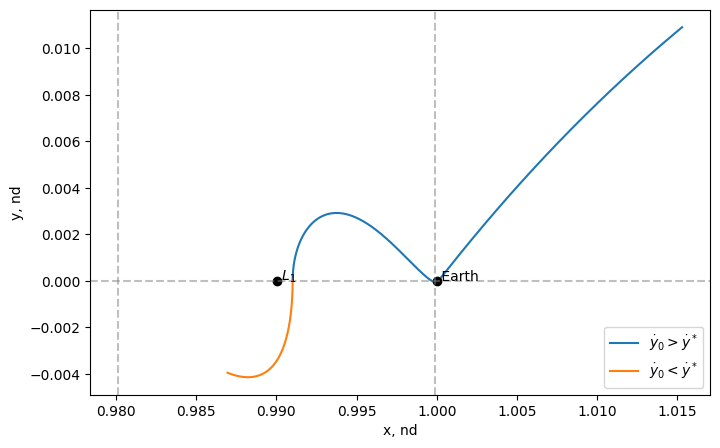

In [9]:
# График на плоскости XOY

plt.figure(figsize=(8, 5))

# траектории
plt.plot(arr0[:, 1], arr0[:, 2], label='$\dot{y}_0 > \dot{y}^*$')
plt.plot(arr1[:, 1], arr1[:, 2], label='$\dot{y}_0 < \dot{y}^*$')

# точка L1
plt.plot(xL1, 0., 'ok')
plt.text(xL1, 0., ' $L_1$')

# Земля
plt.plot(mu1, 0., 'ok')
plt.text(mu1, 0., ' Earth')

# Плоскости
plt.axvline(xmin, ls='--', color='gray', alpha=0.5)
plt.axvline(xmax, ls='--', color='gray', alpha=0.5)

# Ось OX
plt.axhline(0., ls='--', color='gray', alpha=0.5)

plt.legend()

plt.xlabel('x, nd')
plt.ylabel('y, nd')
plt.show()

In [10]:
@nb.njit(**jkw)
def get_plane(vy, f, s, h, mc, n, pl):
    s0 = s.copy()
    s0[4] = vy
    arr = rk_nsteps_plane(f, 0., s0, h, mc, n, pl)
    x = arr[-1, 1]
    mid = pl.mean()
    return -1 if x < mid else 1

In [11]:
pl = np.array([xmin, xmax])

In [12]:
@nb.njit(**jkw)
def bisect(f, a, b, args, xtol):
    xmin = a * 1.
    xmax = b * 1.
    x = (xmax + xmin) / 2.
    while abs(xmax - xmin) > 2 * xtol:
        x = (xmax + xmin) / 2
        xmin_val = f(xmin, *args)
        x_val = f(x, *args)
        if xmin_val * x_val <= 0:
            xmax = x
        else:
            xmin = x
    return (xmax + xmin) / 2

In [13]:
@nb.njit(**jkw)
def bisect(f, a, b, args, xtol, maxiter=100):
    xa = a * 1.
    xb = b * 1.
    fa = f(xa, *args)
    dm = xb - xa
    for itr in range(maxiter):
        dm *= 0.5
        xm = xa + dm
        fm = f(xm, *args)
        if fm * fa >= 0:
            xa = xm
        if fm == 0 or abs(dm) < xtol:
            root = xm
            itr += 1
            break
    return root

In [14]:
s0 = np.zeros(6)
s0[[0, 2]] = xL1 + d * 0.1, d * 0.1

vy_saddle = bisect(get_plane, -0.02, 0.02, args=(crtbp_ode, s0, h, mc, 100000, pl), xtol=1e-16)
vy_saddle

/Users/rmnigm/Library/Caches/pypoetry/virtualenvs/py-cp3-hgRqsJSf-py3.9/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/var/folders/r9/5px6351n6fx3yqdywn2tdlqs14pvmr/T/ipykernel_12086/4114901270.py:10: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  fm = f(xm, *args)
/var/folders/r9/5px6351n6fx3yqdywn2tdlqs14pvmr/T/ipykernel_12086/4114901270.py:5: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  fa = f(xa, *args)
/Users/rmnigm/Library/Caches/pypoetry/virtualenvs/py-cp3-hgRqsJSf-py3.9/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


-0.005963227693821906

In [15]:
def preset_grid(xmin, xmax, zmin, zmax, N):
    x_step = (xmax - xmin) / N
    z_step = (zmax - zmin) / N
    speeds = np.zeros((N, N, 6))
    xs = np.arange(xmin, xmax, x_step)
    zs = np.arange(zmin, zmax, z_step)
    for i in range(N):
        for j in range(N):
            speeds[i, j][[0, 2]] = xs[i], zs[j]
    return speeds


@nb.njit(**jkw)
def get_speed(f, s, h, mc, n, pl):
    return bisect(get_plane, -1, 1, args=(f, s, h, mc, n, pl), xtol=1e-12)


@nb.njit(parallel=True)
def compute_grid(f, starter_speeds, h, mc, n, pl):
    N = len(starter_speeds)
    speeds = np.zeros((N, N), dtype=np.float64)
    for i in nb.prange(N):
        for j in range(N):
            s = starter_speeds[i, j].astype(np.float64)
            speeds[i, j] = get_speed(f, s, h, mc, n, pl)
    return speeds

In [16]:
nb.set_num_threads(8)

In [ ]:
h = np.pi / 180

In [ ]:
grid = preset_grid(xmin, xmax, 0, d/3, 40)
res = compute_grid(crtbp_ode, grid, h, mc, 100000, pl)
np.save(f'{hash(str(xmin) + str(xmax) + str(0) + str(d/3) + str(40))}.npy', res)

/var/folders/r9/5px6351n6fx3yqdywn2tdlqs14pvmr/T/ipykernel_12086/1408856859.py:25: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  speeds[i, j] = get_speed(f, s, h, mc, n, pl)
/var/folders/r9/5px6351n6fx3yqdywn2tdlqs14pvmr/T/ipykernel_12086/1408856859.py:25: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  speeds[i, j] = get_speed(f, s, h, mc, n, pl)
/var/folders/r9/5px6351n6fx3yqdywn2tdlqs14pvmr/T/ipykernel_12086/1408856859.py:25: NumbaWarning: Cannot cache compiled function "get_speed" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  speeds[i, j] = get_speed(f, s, h, mc, n, pl)
